<a href="https://colab.research.google.com/github/Prathambiradr12345/Machine-_learning/blob/main/Capping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('pl.csv')

In [5]:
df.sample(5)

,cgpa,placement_exam_marks,placed
959,6.76,27.0,1
624,7.35,80.0,1
975,8.43,25.0,1
288,7.07,21.0,0
463,6.82,49.0,1


<ipython-input-8-dba16731dd87>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


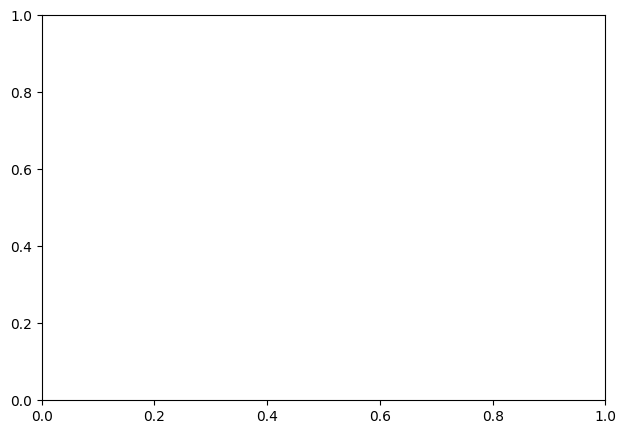

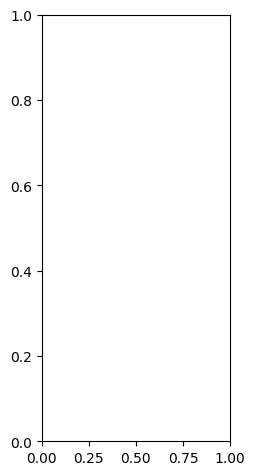

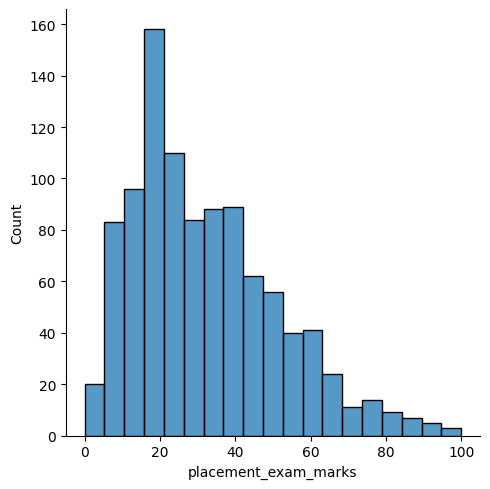

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.displot(df['cgpa'])

plt.subplot(1,2,2)
sns.displot(df['placement_exam_marks'])

plt.show()

In [9]:
print('mean value if cgpa',df['cgpa'].mean())
print('std value if cgpa',df['cgpa'].std())
print('min value if cgpa',df['cgpa'].min())
print('max value if cgpa',df['cgpa'].max())

mean value if cgpa 6.96124
std value if cgpa 0.6158978751323894
min value if cgpa 4.89
max value if cgpa 9.12


In [15]:
print('highest allowed',df['cgpa'].mean()+3*df['cgpa'].std())
print('lowest allowed',df['cgpa'].mean()-3*df['cgpa'].std())

highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [16]:
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [17]:
#trimming
new_df=df[(df['cgpa']<=8.80) & (df['cgpa']>=5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [18]:
#approach-2
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [19]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [20]:
df[df['cgpa_zscore']>-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [21]:
df[(df['cgpa_zscore']> 3) | (df['cgpa_zscore']<-3)]
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [23]:
#trimming
new_df=df[(df['cgpa_zscore']<=3) & (df['cgpa_zscore']>=-3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


**Capping**

In [24]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

In [25]:
df['cgpa']=np.where(df['cgpa']>upper_limit,upper_limit,np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa']))

In [28]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934


In [29]:
df.shape

(1000, 4)